In [34]:
from langchain_openai import OpenAIEmbeddings
# from langchain_community.vectorstores import FAISS
# from langchain.document_loaders.json_loader import JSONLoader
# from langchain.document_loaders import DirectoryLoader, TextLoader
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from dotenv import load_dotenv
import os
import json

# Load the environment variables
load_dotenv()

True

# Load the data

In [35]:
directory = "test/test"
# loader = DirectoryLoader(directory, glob='**/*.json', show_progress=True, loader_cls=TextLoader)
# data_full_text = loader.load()
# len(data_full_text)
data_full_text = []
for filename in os.listdir(directory):
    text = {}
    if filename.endswith('.json'):
        with open(os.path.join(directory, filename), 'r') as json_file:
            data = json.load(json_file)
            ocr_texts = [ocr['text'] for ocr in data['0']['ocr']]
            concatenated_text = '\n'.join(ocr_texts)
            data_full_text.append({"source": filename, "text": concatenated_text})


In [36]:
data_full_text[0]

{'source': 'dcc4a106ec167c5624a2b25430f042fd.png.CACHE.json',
 'text': 'Ayse Deli\nAm Schloß 9\n35410 Hungen\nInsiders Versicherungen\nBrüsseler Straße 100\n67657 Kaiserslautern\nKündigung der Rentenversicherung Nr. 53189\nDatum: 14.07.2015\nVerehrte Damen und Herren,\nleider muss ich Ihnen mit diesem Schreiben mitteilen, dass mein Ehemann Heinrich\nvergangenen Montag verstorben ist. Bitte heben Sie aus diesem Grund den oben\ngenannten Vertrag auf. Ich übersende Ihnen Ende dieser Woche den\nVersicherungsschein sowie eine beglaubigte Sterbeurkunde.\nDen Auszahlungsbetrag möchten Sie bitte auf das Konto 0147258369, BLZ 10020030\nbei der Beispielbank Bielefeld erstatten.\nFreundliche Grüße\nDeli'}

# Find the embeddings for the documents

In [37]:
embeddings = OpenAIEmbeddings()
vectors = embeddings.embed_documents([x['text'] for x in data_full_text])
len(vectors)

280

# Apply KMeans clustering

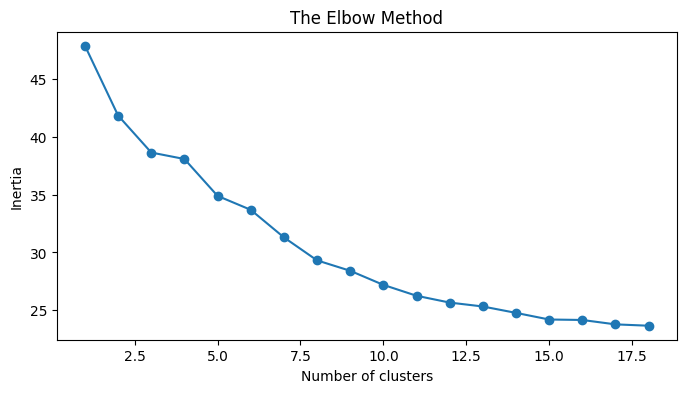

In [38]:
# Applying KMeans clustering on cleaned data with range of clusters
inertia = []
for k in range(1, 19):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(vectors)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 19), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# From the above graph, we can see that the elbow is at 11. So, we will use 11 clusters for our KMeans clustering

In [39]:
# Applying KMeans clustering on cleaned data with 8 clusters
k_optimal = 11
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=0).fit(vectors)
kmeans_optimal.labels_

array([ 2,  6,  9,  9,  0, 10,  9,  4,  7,  9,  9,  4,  9,  9,  9,  9,  7,
        5,  4,  9,  8,  7,  7,  9,  8,  9,  2,  4,  5,  7,  8,  9,  5,  1,
       10,  5,  9,  9,  3,  9,  8,  9,  8,  1,  9,  5,  3,  2,  6,  7,  5,
        6,  2,  9,  9,  7,  3,  5,  5,  2,  8,  5,  8,  4,  8,  2, 10,  9,
        3,  0,  4,  3,  3,  9,  6,  0,  5,  5,  9,  9,  4,  8,  0,  0,  8,
        9,  9,  2,  9,  2,  9,  9,  3,  9,  9,  9, 10,  7,  0,  9, 10,  4,
        4,  4,  9, 10,  9,  5,  8,  0,  2,  9,  8, 10,  2,  9,  0,  1,  6,
        7,  8,  9,  2,  9,  2,  8, 10,  9,  9,  2,  9,  0,  4,  9, 10,  6,
        9,  8,  9,  9,  2,  9,  3,  0,  4,  4,  3,  2,  9,  3,  9, 10,  5,
        0,  9,  9,  3,  3,  8,  3,  9,  2,  4,  7,  9, 10,  7,  9,  9,  8,
        6,  9,  9, 10,  9,  5,  0,  9,  9,  9,  9,  7,  9,  9,  9,  5,  0,
        2,  9,  4, 10,  9,  2,  9,  0,  4,  9, 10,  0,  7,  7,  1,  9,  4,
        5,  3,  2,  7, 10,  5,  9,  4,  7,  2,  3,  9,  9,  4,  5,  9,  8,
        9,  9,  9,  9,  9

# Processing the data

In [41]:
import pandas as pd
import os

df = pd.DataFrame(os.path.basename(row['source'])[:-15] for row in data_full_text)
df['label']=kmeans_optimal.labels_
df

,0,label
0,dcc4a106ec167c5624a2b25430f042fd,2
1,e0abc9a25ac589aedafbbb26ec5ece3d,6
2,25a7a30c448e90fe7a74a8cf63d9c974,9
3,e2620553c53f7636ed76c4f45d9a679c,9
4,57ab20f06d415a76b461cc120006cd2d,0
...,...,...
275,ec21736a67a68366ac663509359b7c5a,4
276,1babf4d02b82740ef69faf94d3519029,0
277,bc1dcfe1372f4f0f7692c7108cc9eff5,9
278,879fc26b7fc361fff6bc7681ba235ad3,9


In [45]:
new = {
    "clusters": {
        "cluster_0" : "Cluster 0",
        "cluster_1" : "Cluster 1",
        "cluster_2" : "Cluster 2",
        "cluster_3" : "Cluster 3",
        "cluster_4" : "Cluster 4",
        "cluster_5" : "Cluster 5",
        "cluster_6" : "Cluster 6",
        "cluster_7" : "Cluster 7",
        "cluster_8" : "Cluster 8",
        "cluster_9" : "Cluster 9",
        "cluster_10" : "Cluster 10"
    },
    "samples": {}

}

In [46]:
for index, row in df.iterrows():
    new["samples"][row[0]] = "cluster_" + str(row['label'])
new

{'clusters': {'cluster_0': 'Cluster 0',
  'cluster_1': 'Cluster 1',
  'cluster_2': 'Cluster 2',
  'cluster_3': 'Cluster 3',
  'cluster_4': 'Cluster 4',
  'cluster_5': 'Cluster 5',
  'cluster_6': 'Cluster 6',
  'cluster_7': 'Cluster 7',
  'cluster_8': 'Cluster 8',
  'cluster_9': 'Cluster 9',
  'cluster_10': 'Cluster 10'},
 'samples': {'dcc4a106ec167c5624a2b25430f042fd': 'cluster_2',
  'e0abc9a25ac589aedafbbb26ec5ece3d': 'cluster_6',
  '25a7a30c448e90fe7a74a8cf63d9c974': 'cluster_9',
  'e2620553c53f7636ed76c4f45d9a679c': 'cluster_9',
  '57ab20f06d415a76b461cc120006cd2d': 'cluster_0',
  '44c71bf12711a784d99a2ab2a2968778': 'cluster_10',
  'ef10fc8b264be83ec52bed6a2422d80e': 'cluster_9',
  '59fb71f178f247523719897bb6127a66': 'cluster_4',
  '56f44e496f67769a69bed6500fd7f694': 'cluster_7',
  '412e0942006af3c01d8ea8a9ba481268': 'cluster_9',
  'aa87d3aecf507f0f1e13a00b8b57429f': 'cluster_9',
  '21ce753349be82d5c1c4ff26057f6158': 'cluster_4',
  '4072108702e781154aac5cf7895b6ce7': 'cluster_9',
  

In [47]:
import json
file_path = "test_dictionary_data.json"

# Write dictionary to JSON file
with open(file_path, "w") as json_file:
    json.dump(new, json_file, indent=4)

print(f"Dictionary saved to {file_path}")

Dictionary saved to test_dictionary_data.json


In [9]:
# loader = JSONLoader(
#     file_path='test.json',
#     jq_schema=".ocr[].text",
#     text_content=False)
#
# data = loader.load()
# print(f'document count: {len(data)}')
# data

In [10]:
# # Load the vectorstore
# faiss_index = FAISS.from_documents(data_full_text, embeddings)
# faiss_index.save_local("faiss_index")
# faiss_db = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)

In [11]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
#
# # Taking out the warnings
# import warnings
# from warnings import simplefilter
#
# # Filter out FutureWarnings
# simplefilter(action='ignore', category=FutureWarning)
#
# # Perform t-SNE and reduce to 2 dimensions
# tsne = TSNE(n_components=2, random_state=42)
# reduced_data_tsne = tsne.fit_transform(vectors)
#
# # Plot the reduced data
# plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.title('Book Embeddings Clustered')
# plt.show()